In [6]:
def binomial(n,k):
    if k == 0:
        return 1
    else: 
        N = 1
        K = 1
        for i in range(1,k+1):
            N *= (n-i+1)
            K *= i
        
    
    return N/K

In [8]:
binomial(10,5)

252.0

$$
p(k|n)=\frac{\begin{pmatrix}n\\ k\end{pmatrix}}{2^n}
$$

In [13]:
def azar(n,k):
    return binomial(n,k)/2**n

def azar2(n,k):
    sum = 0
    for i in range(k,101):
        sum += azar(n,i)
    return sum    

In [10]:
azar(100,60)

0.010843866711637987

In [14]:
azar2(100,60)

0.028443966820490392

# Ejercicio primos

Estaba díficil, no te culpo. Aunque programarlo en python no estaba taaan complicado (en julia si esta más elaborado). Python tiene la fortuna de que es válida la siguiente estructura:

`for i in dominio:
    ...
 else:
    condición
    `

Esto nos dice que si el ciclo `for` no se cumple, entonces vaya al `else` a cumplir alguna otra sentencia. En este sentido podíamos usar el ciclo `for` para evaluar que cada entero del 1 al 10 000 sea divisible entre los primos que se adhieran en la lista bajo ciertas condiciones; si esas condiciones no se cumplían entonces, quería decir que era un primo más y podía pasar al al `else` agregando ese número a la lista de primos.

**Algorítmo de la clase**

* Para comprobar que un número `n` es divisible entre otros números (que sean primos) necesitamos ver que se cumpla `mod(n,p)=0` donde `p` es un número primo. (Este paso es importante para evitar términos repetidos).
* Todo número es divisible entre un número primo, por tanto, ocupamos hallar todos los factores primos de `n` y deben de ser menores a $\sqrt{n}$. Si no existe ningún factor primo menor a $\sqrt{n}$ entonces hemos hallado un nuevo primo.
    * Sin embargo, si hallamos un factor primo menor a $\sqrt{n}$ entonces no vale la pena seguir buscando y por tanto es necesario pasarse a la siguiente iteración.
 
**Algoritmo alternativo**

* Se testean todos los números en un dominio definido desde 2 hasta n, estos se denotan bajo el índice `i`
* Ocuparemos un subconjunto del dominio que vaya de 2 al `i` en turno. Estos se denotan bajo `j`
    * Vamos a testear si el modulo de estos números es cero.
* Si si, rompemos el ciclo y guardamos en una lista vacía. 


In [1]:
import math as mt

In [2]:
n = 20
primos = []
for i in range(2,n+1):
    for j in range(2,i):
        if i % j == 0:
            break
    else:
        primos.append(i)
primos
            

[2, 3, 5, 7, 11, 13, 17, 19]

In [7]:
n=20
primos = [2]
for i in range(3,n):
    es_primo = True
    limite = mt.sqrt(i)
    for primo in primos:
        if primo > limite:
            break
        if i % primo == 0:
            es_primo = False
            break
    if es_primo:
        primos.append(i)
primos

[2, 3, 5, 7, 11, 13, 17, 19]

# Tarea 3

Esta tarea totalmente me rebasó en mis capacidades, por lo que no pude hacerla; por tanto voy a pedir ayuda a chatgpt para que me ayude a resolverla.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D

#from tqdm import tqdm

#%matplotlib notebook
#from ipywidgets import *

#from pylab import *

## Ejercicio 1

In [9]:
meses = []
manchas_solares = []

with open('manchasolares.txt', 'r') as file:
    for line in file:
        mes, manchas = map(float, line.split())
        meses.append(mes)
        manchas_solares.append(manchas)


### Inciso a)

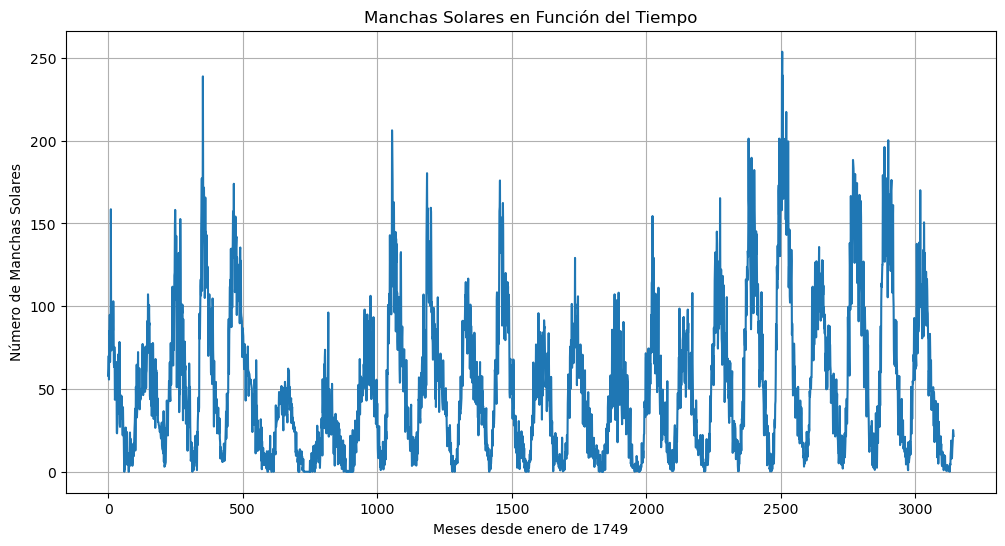

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(meses, manchas_solares)
plt.title('Manchas Solares en Función del Tiempo')
plt.xlabel('Meses desde enero de 1749')
plt.ylabel('Número de Manchas Solares')
plt.grid(True)
plt.show()


### Inciso b)

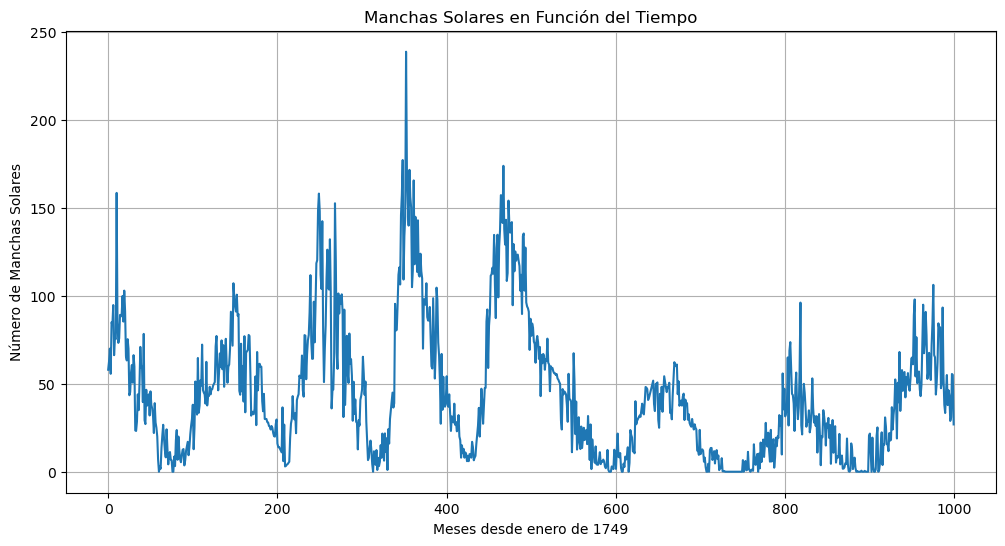

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(meses[0:1000], manchas_solares[0:1000])
plt.title('Manchas Solares en Función del Tiempo')
plt.xlabel('Meses desde enero de 1749')
plt.ylabel('Número de Manchas Solares')
plt.grid(True)
plt.show()

### Inciso c)

$$Y_k=\frac{1}{2r} \sum_{m=-r}^r y_{k+m}$$

In [18]:
# Calcular la media móvil con r=5
r = 5
media_movil = []

for k in range(1000):
    suma = 0
    for m in range(-r, r + 1):
        if k + m >= 0 and k + m < 1000:
            suma += manchas_solares[k + m]
    media_movil.append(suma/(2 * r))

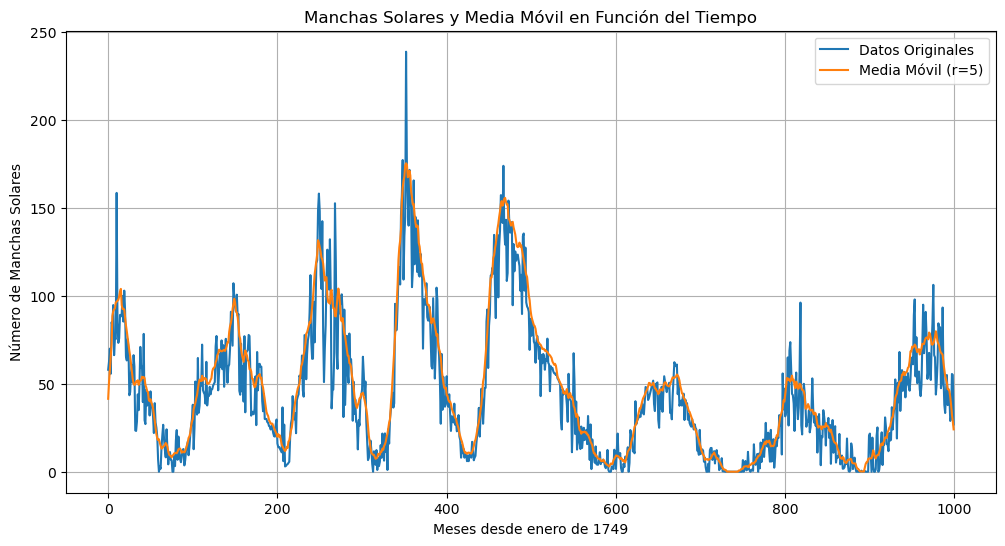

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(meses[0:1000], manchas_solares[:1000], label='Datos Originales')
plt.plot(meses[0:1000], media_movil, label='Media Móvil (r=5)')
plt.title('Manchas Solares y Media Móvil en Función del Tiempo')
plt.xlabel('Meses desde enero de 1749')
plt.ylabel('Número de Manchas Solares')
plt.grid(True)
plt.legend()
plt.show()

## Ejercicio 2

### Inciso a)


In [23]:
# Definir valores de t en el rango de 0 a 2*pi
t = np.linspace(0, 2 * np.pi, 1000)

# Calcular las coordenadas x(t) e y(t) utilizando las ecuaciones paramétricas
x = 2 * np.cos(t) + np.cos(2 * t)
y = 2 * np.sin(t) - np.sin(2 * t)

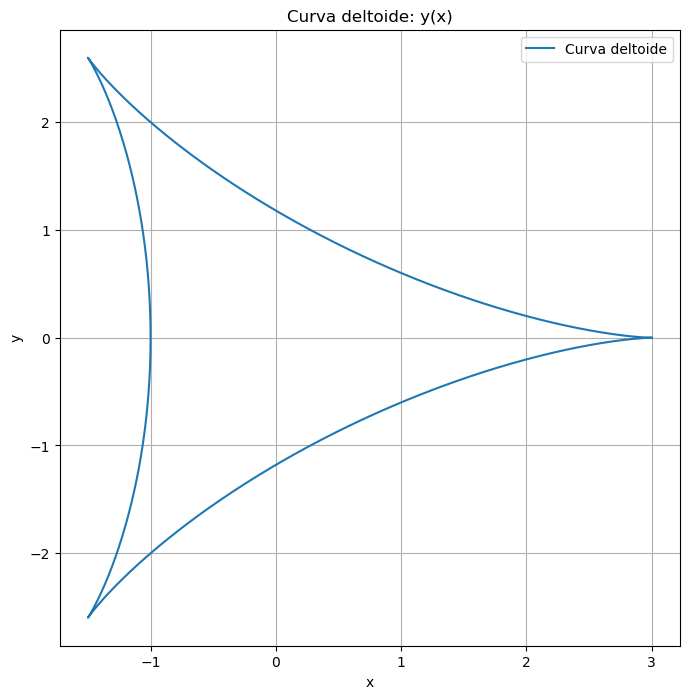

In [24]:
# Crear la gráfica de y en función de x
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Curva deltoide')
plt.title('Curva deltoide: y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# Definir valores de θ en el rango de 0 a 10π
theta = np.linspace(0, 10 * np.pi, 1000)

# Calcular r(t) = t² para los valores de θ
r = theta**2

# Convertir coordenadas polares (r, θ) a coordenadas cartesianas (x, y)
x = r * np.cos(theta)
y = r * np.sin(theta)

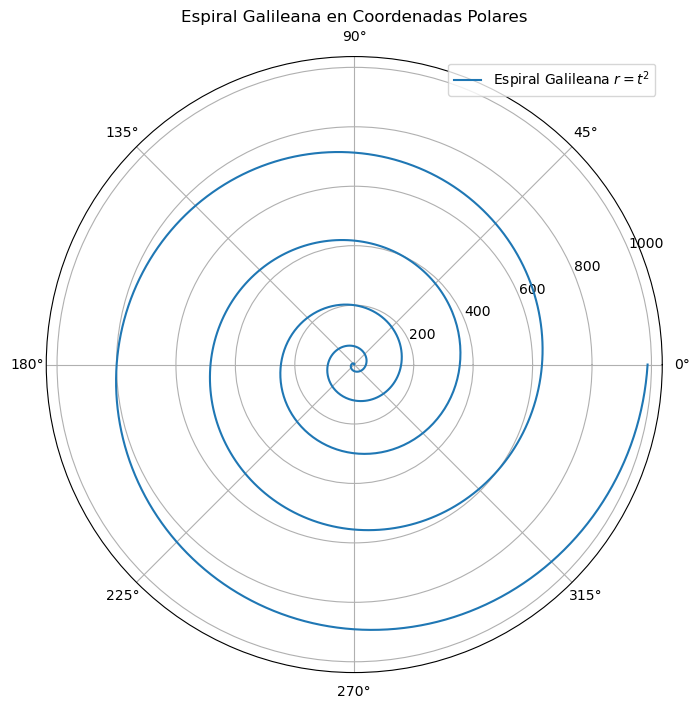

In [27]:
# Crear la gráfica polar de r = t²
plt.figure(figsize=(8, 8))
plt.polar(theta, r, label='Espiral Galileana $r = t^2$')
plt.title('Espiral Galileana en Coordenadas Polares')
plt.grid(True)
plt.legend()
plt.show()

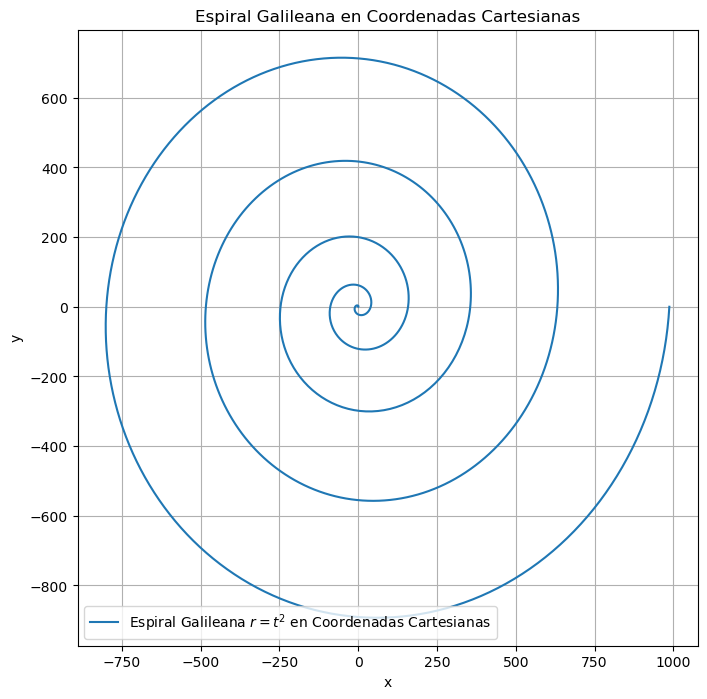

In [28]:
# Crear la gráfica en coordenadas cartesianas
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Espiral Galileana $r = t^2$ en Coordenadas Cartesianas')
plt.title('Espiral Galileana en Coordenadas Cartesianas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

### Inciso c)

In [31]:
theta = np.linspace(0, 24 * np.pi, 1000)

# Calcular r(θ) = 1 / (θ + sin(θ))
r = np.exp(np.cos(theta)) - 2*np.cos(4*theta) + np.sin(theta/12)**5

# Convertir coordenadas polares (r, θ) a coordenadas cartesianas (x, y)
x = r * np.cos(theta)
y = r * np.sin(theta)

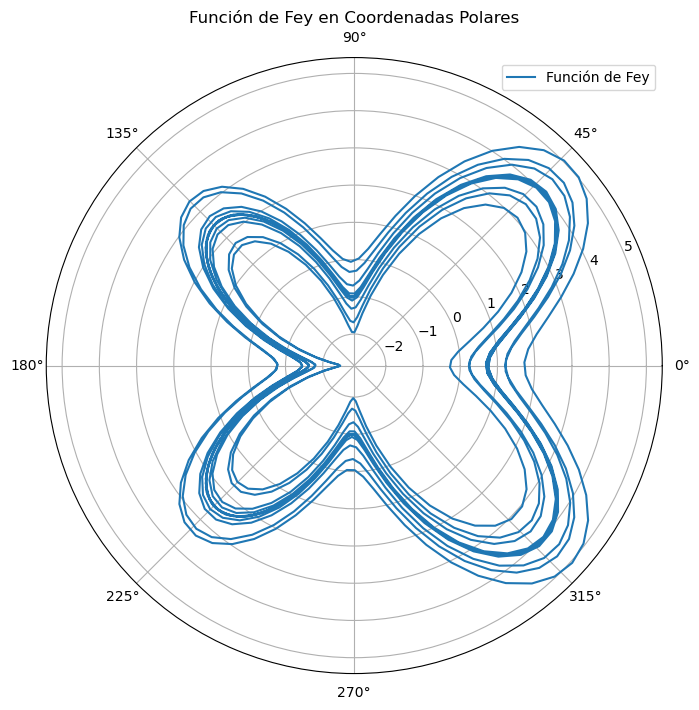

In [32]:
# Crear la gráfica polar de la "función de Fey"
plt.figure(figsize=(8, 8))
plt.polar(theta, r, label='Función de Fey')
plt.title('Función de Fey en Coordenadas Polares')
plt.grid(True)
plt.legend()
plt.show()

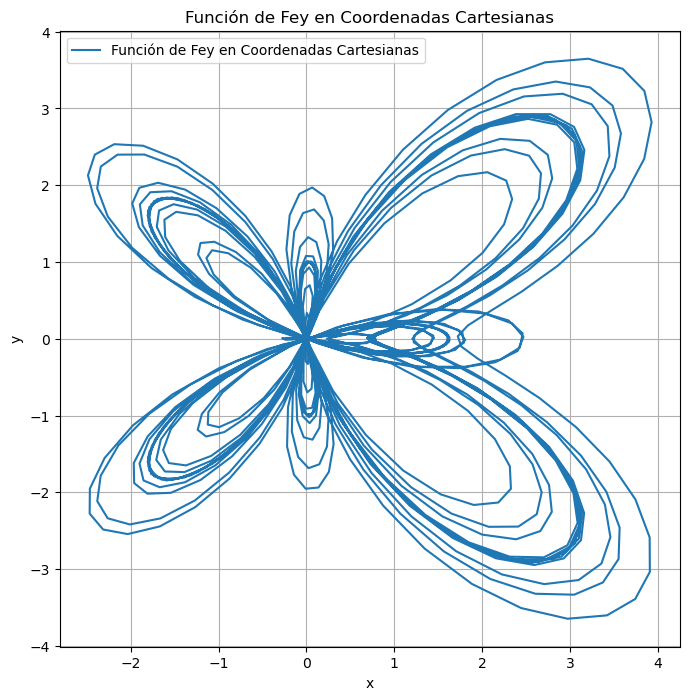

In [33]:
# Crear la gráfica en coordenadas cartesianas
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Función de Fey en Coordenadas Cartesianas')
plt.title('Función de Fey en Coordenadas Cartesianas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## Ejercicio 3

### Inciso i)

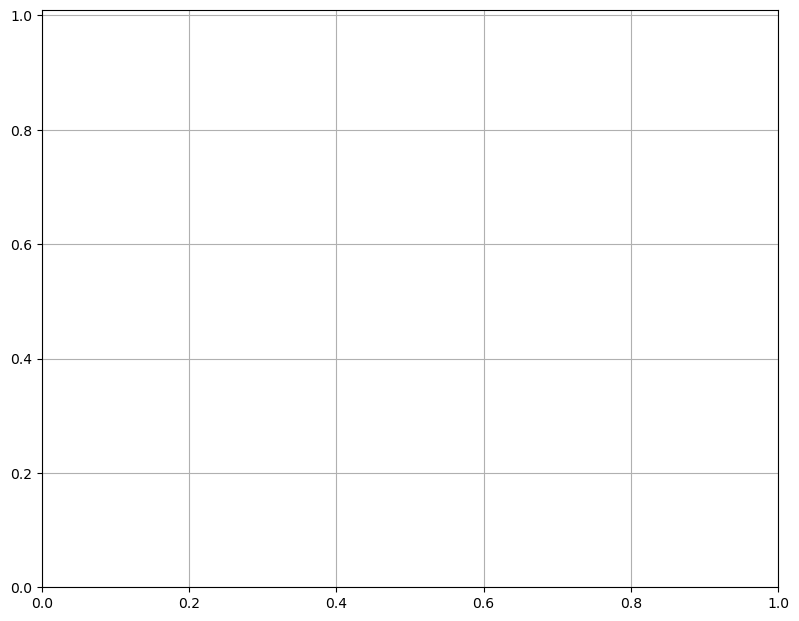

In [3]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.grid(True)


#@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01)) 
def update(x0=0.5,r = 3.):
    
    n = 100
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
  
    T=np.linspace(0,1,n,endpoint=False)
    
    plt.plot(T,T, color="black")
    plt.plot(T,r*T*(1-T) ) 
    
    plt.plot(0.,0.,'go')   
    
    eqx = float(r-1)/float(r)    
    plt.plot(eqx,Logistico(r,eqx),'go')    

    x = x0
        
    if x0 < eqx:
        
        xV = [0, x0]        
        yV = [x0, x0]       
        plt.plot(yV, xV, color='red')   
        
    else:
        xV = [x0,x0]    
        yV = [Logistico(r,x0), 0]        
        plt.plot(xV, yV, color='red')   
 
    
    
    for i in range(1,n):       
        
        if x == x0:            
            if x0 < eqx:
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,x)
#         X.append(x)

        Pf = [a, x] 
        plt.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        plt.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        plt.plot(xV, yV)   

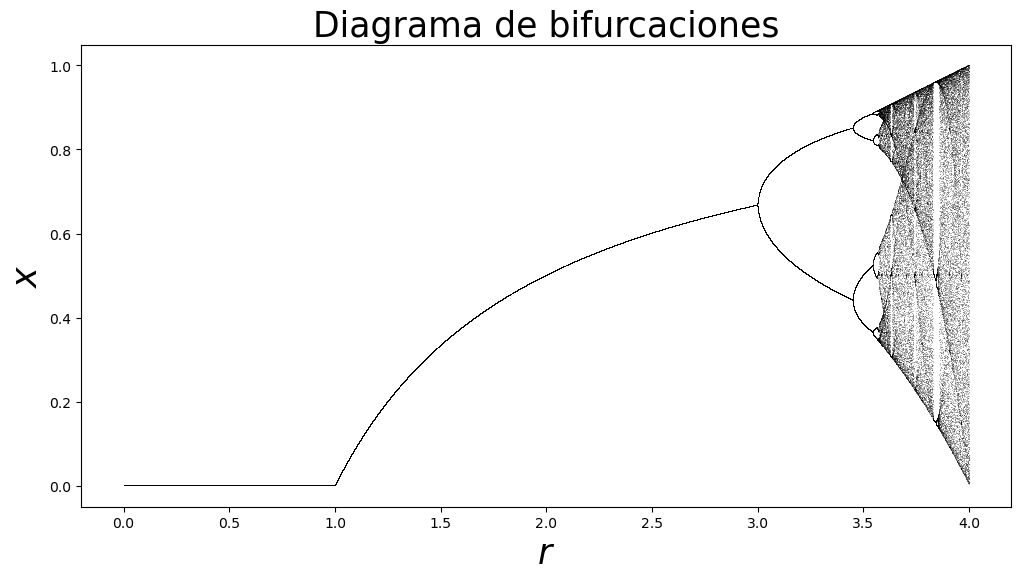

In [3]:
def Logistico(r,x):
    return r*x*(1-x) 

def diagramasBifurcaciones(f,x0):
    r = np.arange(0,4,0.0001)
    iters = 1000
    last = 10
    x = x0
    for i in range(iters+last):
        x = f(r,x)
        if i >= iters:
            plt.plot(r, x, ',k', alpha=0.25)  # alphaSet transparencia
    plt.title("Diagrama de bifurcaciones",size=25)
    plt.xlabel("$r$",size=25)
    plt.ylabel("$x$",size=25)
    #plt.plot(2,1,'go',label="$r=2$, $x=1$")
    #plt.legend()
    plt.savefig("mapeo1")
    plt.show()

plt.figure(figsize=[12,6])
diagramasBifurcaciones(Logistico,0.5)

### Inciso iii)


In [71]:
# Definir un rango de valores de r
r_values = np.linspace(1.0, 4.0, 10000)

# Crear un arreglo x inicializado en 0.5 para cada valor de r
x_values = 0.5*np.ones_like(r_values)
#x_values[0] = 0.5

# Número de iteraciones
num_iterations = 1000

In [72]:
# Realizar la iteración del mapeo logístico para todos los valores de r
for i in range(num_iterations):
    x_values = r_values * x_values * (1 - x_values)


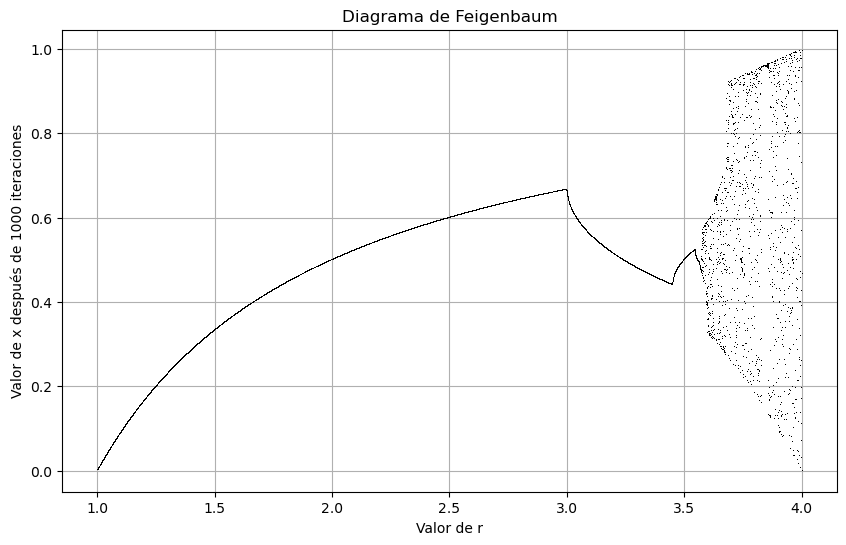

In [73]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(r_values, x_values, ',k')
plt.title('Diagrama de Feigenbaum')
plt.xlabel('Valor de r')
plt.ylabel('Valor de x después de {} iteraciones'.format(num_iterations))
plt.grid(True)
plt.show()

## Ejercicio 4

### Inciso a)

In [10]:
# Tamaño de la cuadrícula
N = 800

# Rango de valores para x e y
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0

# Crear una cuadrícula de valores complejos en el rango dado
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x, y)
c_values = X + 1j * Y

In [102]:
# Inicializar la matriz de salida con ceros (todos los puntos fuera del conjunto)
mandelbrot = np.zeros_like(c_values, dtype=np.uint8)

# Número máximo de iteraciones
max_iterations = 100

# Iterar para cada punto c
z = np.zeros_like(c_values)
for i in range(max_iterations):
    z = z**2 + c_values
    # Verificar si los puntos han escapado
    mask = np.abs(z) < 2.0
    mandelbrot += mask

/tmp/ipykernel_23476/3161144947.py:10: RuntimeWarning: overflow encountered in square
  z = z**2 + c_values
/tmp/ipykernel_23476/3161144947.py:10: RuntimeWarning: invalid value encountered in square
  z = z**2 + c_values
/tmp/ipykernel_23476/3161144947.py:12: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(z) < 2.0


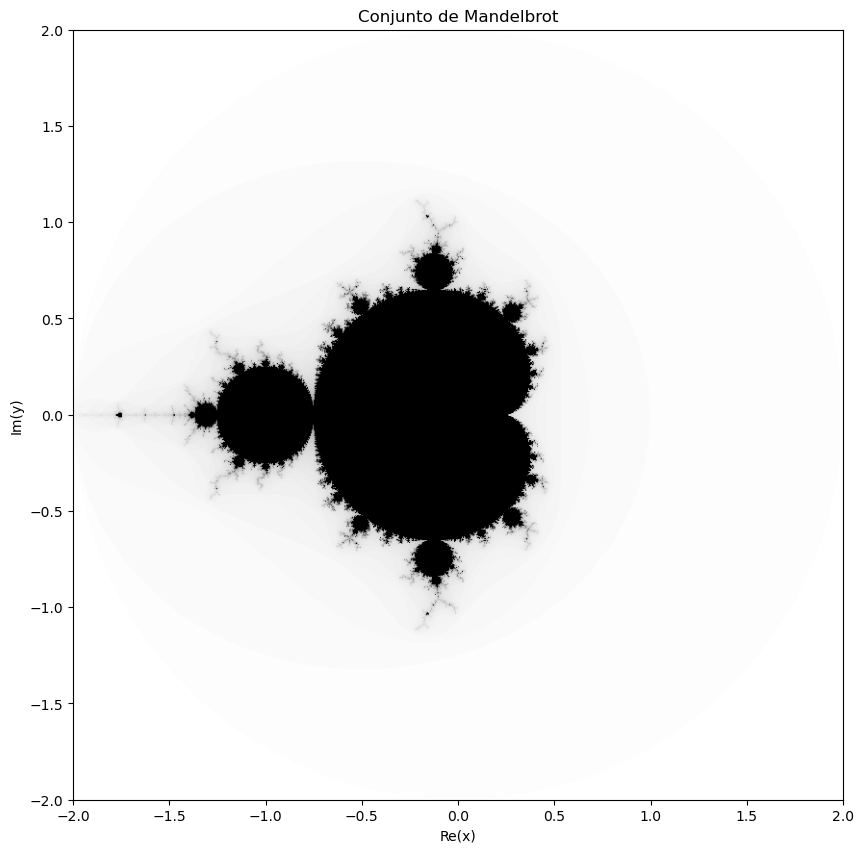

In [103]:
# Crear la imagen de densidad (density plot)
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot, extent=(x_min, x_max, y_min, y_max), cmap='binary', origin='lower')
plt.title('Conjunto de Mandelbrot')
plt.xlabel('Re(x)')
plt.ylabel('Im(y)')
plt.show()

/tmp/ipykernel_23476/523568158.py:26: RuntimeWarning: overflow encountered in square
  z = z**2 + c_values
/tmp/ipykernel_23476/523568158.py:26: RuntimeWarning: invalid value encountered in square
  z = z**2 + c_values
/tmp/ipykernel_23476/523568158.py:28: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(z) < 2.0


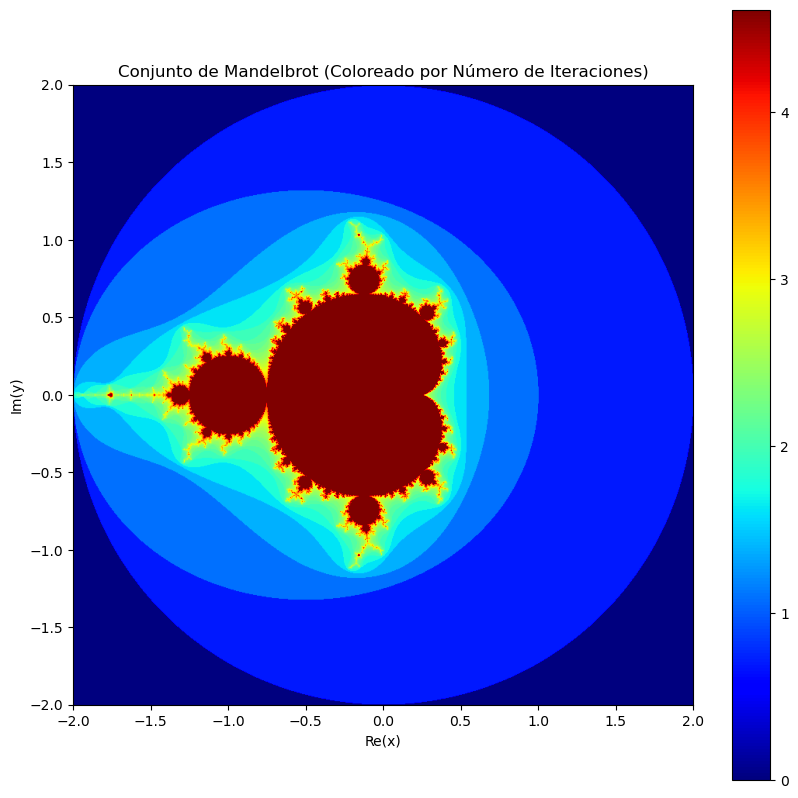

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Tamaño de la cuadrícula
N = 800

# Rango de valores para x e y
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0

# Crear una cuadrícula de valores complejos en el rango dado
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x, y)
c_values = X + 1j * Y

# Inicializar la matriz de salida con ceros (todos los puntos fuera del conjunto)
mandelbrot = np.zeros_like(c_values, dtype=np.uint8)

# Número máximo de iteraciones
max_iterations = 100

# Iterar para cada punto c y registrar el número de iteraciones
z = np.zeros_like(c_values)
for i in range(max_iterations):
    z = z**2 + c_values
    # Verificar si los puntos han escapado
    mask = np.abs(z) < 2.0
    mandelbrot += mask

# Colorear los puntos según el número de iteraciones (utilizando el esquema "jet")
plt.figure(figsize=(10, 10))
plt.imshow(np.log(mandelbrot + 1), extent=(x_min, x_max, y_min, y_max), cmap='jet', origin='lower')
plt.title('Conjunto de Mandelbrot (Coloreado por Número de Iteraciones)')
plt.xlabel('Re(x)')
plt.ylabel('Im(y)')
plt.colorbar()
plt.show()


## Ejercicio 5

In [23]:
def factorial(n):
    if n < 0:
        return None  # Manejo de entradas inválidas (números negativos)
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def factorialF(n):
    if n < 0:
        return None  # Manejo de entradas inválidas (números negativos)
    result = 1.
    for i in range(1, n + 1):
        result *= i
    return result

In [24]:
factorial(200)

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000

In [26]:
factorialF(200)

inf

##  Ejercicio 6

In [74]:
import math

# Solicitar al usuario que ingrese los coeficientes a, b y c
try:
    a = float(input("Ingresa el coeficiente a: "))
    b = float(input("Ingresa el coeficiente b: "))
    c = float(input("Ingresa el coeficiente c: "))
    
    # Calcular el discriminante
    discriminante = b**2 - 4*a*c
    
    # Verificar si el discriminante es positivo, negativo o cero
    if discriminante > 0:
        # Dos soluciones reales distintas
        x1 = (-b + math.sqrt(discriminante)) / (2*a)
        x2 = (-b - math.sqrt(discriminante)) / (2*a)
        
        x11 = (2*c)/(-b+math.sqrt(discriminante))
        x22 = (2*c)/(-b-math.sqrt(discriminante))
        
        print(f"Las soluciones son x1 = {x1} y x2 = {x2}")
        print(f"Las soluciones son x1 = {x11} y x2 = {x22}")
    elif discriminante == 0:
        # Una solución real (raíz doble)
        x = -b / (2*a)
        print(f"La solución doble es x = {x}")
    else:
        # No hay soluciones reales (raíces imaginarias)
        print("No hay soluciones reales, las raíces son imaginarias.")
except ValueError:
    print("Entrada inválida. Debes ingresar coeficientes numéricos.")


Ingresa el coeficiente a: 0.001
Ingresa el coeficiente b: 1000
Ingresa el coeficiente c: 0.001
Las soluciones son x1 = -9.999894245993346e-07 y x2 = -999999.999999
Las soluciones son x1 = -1000010.5755125057 y x2 = -1.000000000001e-06


In [76]:
print(0.001*x1**2 + 1000*x1 + 0.001)
print(0.001*x2**2 + 1000*x2 + 0.001)

print(0.001*x11**2 + 1000*x11 + 0.001)
print(0.001*x22**2 + 1000*x22 + 0.001)

1.0575401665491313e-08
7.247924804689582e-08
10575.62534720993
0.0


## Ejercicio 7

$$
\frac{df}{dx}=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0)}{h}
$$

In [87]:
def f(x): return x*(x-1)
    
def derivada(f,h,x0):
    D = (f(x0+h)-f(x0))/h
    return D

def der2(h,x0):
    return ((x0+h)*(x0+h-1)-x0*(x0-1))/h


In [90]:
h = 1E-16
x0 = 1

print(derivada(f,x0,h))
print(der2(h,x0))

9.999999999999999e-17
0.0


# Tarea 4


# Integración trapezoidal

$$
\int_a^b f(x)\, dx=\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{k=1}^{n-1}f\left(a+k\cdot\frac{b-a}{n}\right)\right)
$$

In [1]:
#Integración trapecio
def trapecio(f,a,b,n):
    h = (b-a)/n
    x = [a+h*i for i in range(0,n+1)]
    sum = 0
    for i in range(1,n):
        sum += f(a+x[i])
        #sum += f(a+i*(b-a)/n)

    return (b-a)/n*((f(a)+f(b))/2+sum)

# Integración método de Simpson

\begin{align}
\int_a^b f(x)\, dx&=\frac{h}{3}[f(x_0)+4f(x_1)+2f(x_2)+4f(x_3)+2f(x_2)+…+2f(x_{n-2})+4f(x_{n-1})+f(x_n)]\\
&=\sum_{j\ \text{par}}^{n/2} 2f(x_{2i})+\sum_{i\ \text{impar}}^{n/2+1} f(x_{2i-1})+ f(x_0)-f(x_n)
\end{align}

In [2]:
#Simpson
def simpson(f,a,b,n):
    h = (b-a)/n
    sum = 0
    S0 = f(a)-f(b)
    #x = [a+i*h for i in range(0,101)]
    for i in range(1,int(n/2)+1):
        sum += 4*f(a+(2*i-1)*h)+2*f(a+(2*i)*h)
    return h/3*(sum+S0)




# Integración por cuadratura de Gauss

Aplicamos primero un cambio de variable, y los límites de integración también los sustituimos en unos que nos interesen (mi manera de ver esto es desde la teoría hacia la práctica)

$$
\int_a^b f(x)\, dx=\frac{b-a}{2}\int_m^n f\left(\frac{b-a}{2}u+\frac{a+b}{2}\right)\, du
$$

Aplicamos la cuadratura de Gauss con el siguiente paso:

$$
\int_a^b f(x)\, dx=\frac{b-a}{2}\sum_{i=1}^n w_if\left(\frac{b-a}{2}u_i+\frac{a+b}{2}\right)
$$

en este caso, los pesos $w_i$ están definidos de la siguiente forma

$$
w_i=\frac{2}{(1-x_i^2)[P'_n(x_i)]^2}
$$

donde  ${\displaystyle P_{n}}$ es el polinomio de Legendre de grado n en el intervalo [−1, 1], y los xi son las raíces de dicho polinomio.

# Ejercicio 1

La intensidad de la luz en este patrón de difracción esta dada por

$$
I(r)=\left(\frac{J_1(kr)}{kr}\right)^2
$$

donde la $r$ es la distancia del plano focal desde el centro del patrón de difracción, $k=2\pi/\lambda$ y $J_1(x)$ es una función de Bessel. Las funciones de Bessel $J_m(x)$ están dadas por:

$$
J_m(x)=\frac{1}{\pi}\int_0^\pi cos(m\theta-x\sin\theta)\, d\theta
$$

donde $m$ es  un entero no negativo $x\geq 0$

In [44]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import *
import tarea4 as t4

In [4]:
#Inciso a)
def J(m,x):
    def f(θ):
        return np.cos(m*θ-x*np.sin(θ))
    return (1/np.pi)*simpson(f,0,np.pi,1000)

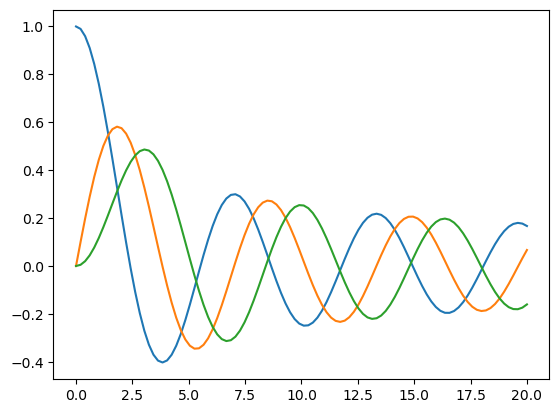

In [5]:
x = np.linspace(0,20,100)
sol0 = []
sol1 = []
sol2 = []
for i in x:
    r0 = J(0,i)
    r1 = J(1,i)
    r2 = J(2,i)
    sol0.append(r0)
    sol1.append(r1)
    sol2.append(r2)
    

plt.plot(x,sol0)
plt.plot(x,sol1)
plt.plot(x,sol2)

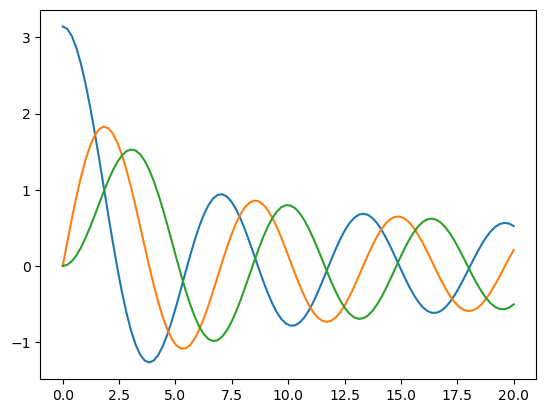

In [6]:
#Inciso b)
def j(m,x):
    def f(θ):
        return np.cos(m*θ-x*np.sin(θ))
    return f
θ = np.linspace(0,np.pi,1000)
j0 = []
j1 = []
j2 = []
for i in x:
    j0.append(integrate.simpson(j(0,i)(θ),θ))
    j1.append(integrate.simpson(j(1,i)(θ),θ))
    j2.append(integrate.simpson(j(2,i)(θ),θ))
    
plt.plot(x,j0)
plt.plot(x,j1)
plt.plot(x,j2)

$$
I(r)=\left(\frac{J_1(kr)}{kr}\right)^2
$$

In [49]:
#Inciso c)
def I(r):
    k = 2*np.pi/500e-9
    J1 = J(1,k*r)
    return (J1/k*r)**2


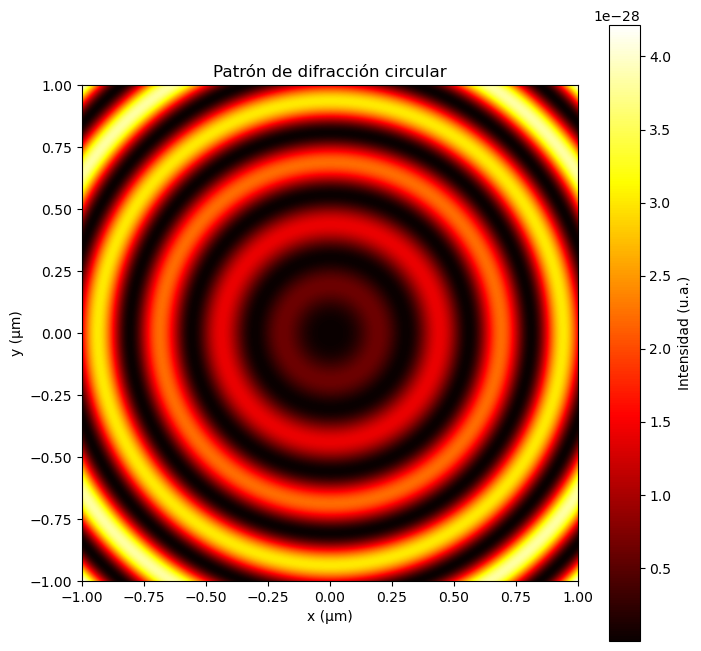

In [51]:
x = np.linspace(-1e-6, 1e-6, 500) # Coordenada x en metros
y = np.linspace(-1e-6, 1e-6, 500) # Coordenada y en metros
X, Y = np.meshgrid(x, y) # Malla de coordenadas
r = np.sqrt(X**2 + Y**2) # Distancia radial desde el centro
for i in r:
    if i.any() < 1e-20:
        i = 0.5 

Intensidad = I(r)  

# Hacer la gráfica de densidad usando matplotlib
plt.figure(figsize=(8,8)) # Crear una figura cuadrada
plt.imshow(Intensidad, cmap='hot', extent=[-1, 1, -1, 1]) # Mostrar la imagen de la intensidad
plt.xlabel('x (μm)') # Etiquetar el eje x
plt.ylabel('y (μm)') # Etiquetar el eje y
plt.title('Patrón de difracción circular') # Dar un título a la gráfica
plt.colorbar(label='Intensidad (u.a.)') # Añadir una barra de color con la etiqueta de la intensidad
plt.show() # Mostrar la gráfica





# EJercicio 2

In [2]:
#a)
def Ej2(x): return x**4-2*x+1

In [4]:
I1 = t4.trapecio(Ej2,0,2,10)
I2 = t4.trapecio(Ej2,0,2,20)

In [5]:
ϵ = 1/3*(I2-I1)
ϵ

-0.026633333333333137

In [32]:
#b)
x = np.linspace(0,2,20)
y = Ej2(x)

In [33]:
I = integrate.trapezoid(y,x)
I

4.429539368175504

In [35]:
1/3*(I-I2)

0.000959789391834498

In [38]:
#Usando quad
integral, error = integrate.quad(Ej2,0,2)
print(integral)
print(error)

4.3999999999999995
5.003996496050337e-14


# Ejercicio 3

In [55]:
import numpy as np

# Función que deseas integrar (debes definir tu propia función aquí)
def f(x):
    return x**4*np.exp(x)/(np.exp(x)-1)**2 # Ejemplo de función: x^2

# Definir los nodos y pesos para la cuadratura de Gauss
# Para una cuadratura de Gauss de n puntos, puedes utilizar bibliotecas como numpy
# para obtener los nodos y pesos correspondientes.
n = 2 # Número de puntos de Gauss (ajusta según tus necesidades)
x, w = np.polynomial.legendre.leggauss(n)

# Calcular la aproximación de la integral
integral = 0.0

for i in range(n):
    integral += w[i] * f(x[i])

# Mostrar el resultado de la aproximación
print("Aproximación de la integral:", integral)


Aproximación de la integral: 0.6484527546773678


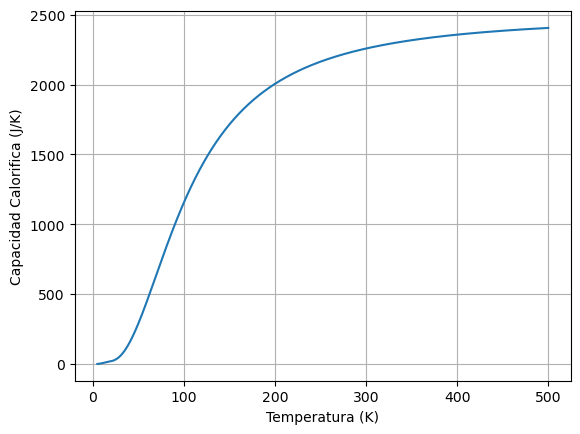

In [56]:
import math 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def gauss_xw_ab(N,a,b):
    x,w = sp.special.roots_legendre(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
    
def f(x):
    f = (x**4 * math.exp(x))/((math.exp(x)-1)**2)
    return f

T = np.linspace(5,500,1000)
N=3
a=0
V=1/1000
p=6.022*1e28
k= 1.380649e-23

def C_p(b):
    x,w = gauss_xw_ab(N,a,428/b)
    S=0
    for i in range(N):
        S = S + w[i]*f(x[i])
        
    C=9*V*p*k*(b/428)**3 * S
    return C

C_v=[C_p(h) for h in T]
    
plt.plot(T,C_v)
plt.grid()
plt.xlabel("Temperatura (K)")
plt.ylabel("Capacidad Calorifica (J/K)")
plt.show()


# Ejecicio 4 

In [2]:
def H(n,x):
    H0 = 1
    H1 = 2*x
    for i in range(n):
        H1 = 2*x*H1-2*n*H0
        H0 = H1
    return h


def osArmonico(n,x): return 1/(np.sqrt(2**n*math.factorial(n)*np.sqrt(np.pi)))*np.exp(-x**2/2)*H(n,x)

In [3]:
H(0,5)

NameError: name 'h' is not defined

In [4]:
x = np.linspace(-4,4,100)
y0 = osArmonico(0,x) 
y1 = osArmonico(1,x) 
y2 = osArmonico(2,x) 
y3 = osArmonico(3,x) 


plt.plot(x,y0)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)


NameError: name 'np' is not defined

Axel olvera 

diego candelas tiene un buen patrón de difracción.

Joel gomez uribe también tiene una propuesta interesante.

Edgar gonzales



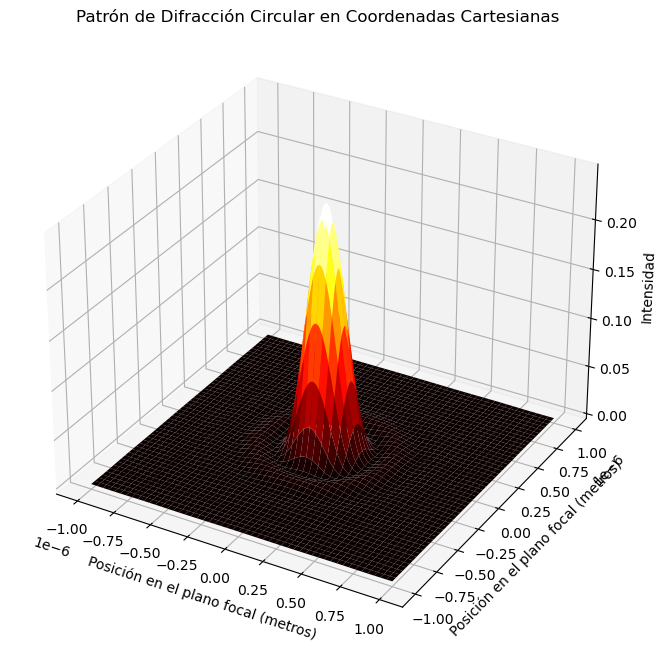

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
wavelength = 500e-9  # Longitud de onda en metros (500 nm)
k = 2 * np.pi / wavelength

# Creacion de la cuadrícula de valores de x y y en una región cuadrada
n_points = 500
x_values = np.linspace(-1e-6, 1e-6, n_points)
y_values = np.linspace(-1e-6, 1e-6, n_points)

# Creacion de la malla de coordenadas cartesianas
x, y = np.meshgrid(x_values, y_values)

# Calculo de la amplitud y la intensidad para cada posición
rho = k * np.sqrt(x**2 + y**2)
amplitude = j1(rho) / rho
amplitude[np.isnan(amplitude) | np.isinf(amplitude)] = 0  # Evitar NaN e Inf
intensity_values = amplitude**2

# Creacion del gráfico tridimensional en coordenadas cartesianas
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, intensity_values, cmap='hot')

ax.set_title('Patrón de Difracción Circular en Coordenadas Cartesianas')
ax.set_xlabel('Posición en el plano focal (metros)')
ax.set_ylabel('Posición en el plano focal (metros)')
ax.set_zlabel('Intensidad')

plt.show()